In [19]:
import os
import pickle
from webscraping.web_driver_config import Research, ResearchPaper
import pandas as pd
from dataclasses import asdict

In [20]:
path_research_ieee_1 = os.path.join("webscraping", "data", "ieee_research_data_1.pkl")
path_research_ieee_2 = os.path.join("webscraping", "data", "ieee_research_data_2.pkl")
path_research_ieee_3 = os.path.join("webscraping", "data", "ieee_research_data_3.pkl")
path_research_ieee_4 = os.path.join("webscraping", "data", "ieee_research_data_4.pkl")
path_research_acm_1 = os.path.join("webscraping", "data", "acm_research_data_1.pkl")
path_research_acm_2 = os.path.join("webscraping", "data", "acm_research_data_2.pkl")


with open(path_research_ieee_1, "rb") as file:
    research_ieee_1 = pickle.load(file)

with open(path_research_ieee_2, "rb") as file:
    research_ieee_2 = pickle.load(file)

with open(path_research_ieee_3, "rb") as file:
    research_ieee_3 = pickle.load(file)

with open(path_research_ieee_4, "rb") as file:
    research_ieee_4 = pickle.load(file)
        
with open(path_research_acm_1, "rb") as file:
    research_acm_1 = pickle.load(file)
with open(os.path.join("webscraping", "data","acm_research_data_1.pkl"), "wb") as file:
    pickle.dump(research_acm_1, file)
        
with open(path_research_acm_2, "rb") as file:
    research_acm_2 = pickle.load(file)   

In [22]:
research = [research_ieee_1, research_ieee_2, research_ieee_3, research_ieee_4, research_acm_1, research_acm_2]
research = [asdict(paper) for paper in research]
df = pd.DataFrame(research)

In [25]:
print(df.columns)

Index(['num_results', 'keywords', 'years', 'publisher', 'url', 'content_type',
       'papers_urls', 'failed_urls', 'papers', 'incomplete_papers'],
      dtype='object')


In [29]:
for keywords in df["keywords"]:
    print(keywords)

("Full Text & Metadata":requirements elicitation) AND ("All Metadata":language model) AND ("Abstract":agile)
("Abstract":gile requirements) AND ("Full Text & Metadata":usage scenario) OR ("Full Text & Metadata":user stories) AND ("Abstract":language models) AND ("All Metadata":elicitation)
("Abstract":requirements elicitation) AND ("All Metadata":language model) AND ("Abstract":agile)
("Full Text & Metadata":requirements elicitation) AND ("Abstract":language model) AND ("Abstract":requirements generation)
[All: requirements elicitation] AND [Abstract: language model] AND [Abstract: agile] 
[All: requirements elicitation] AND [Abstract: language model] AND [Abstract: requirements generation] AND [Full Text: user stories] AND [Full Text: user story] AND [Full Text: agile] 


In [31]:
print(df[["num_results", "years", "keywords", "publisher"]])

   num_results                       years  \
0           29                 2020 - 2025   
1           16                 2020 - 2025   
2            3                 2020 - 2025   
3           21                 2022 - 2025   
4           18  (05/01/2020 TO 05/31/2025)   
5           11  (01/01/2022 TO 05/31/2025)   

                                            keywords publisher  
0  ("Full Text & Metadata":requirements elicitati...      IEEE  
1  ("Abstract":gile requirements) AND ("Full Text...      IEEE  
2  ("Abstract":requirements elicitation) AND ("Al...      IEEE  
3  ("Full Text & Metadata":requirements elicitati...      IEEE  
4  [All: requirements elicitation] AND [Abstract:...       ACM  
5  [All: requirements elicitation] AND [Abstract:...       ACM  


In [3]:
papers_ieee_1 = [paper for paper in research_ieee_1.papers.values()]
papers_ieee_2 = [paper for paper in research_ieee_2.papers.values()]
papers_ieee_3 = [paper for paper in research_ieee_3.papers.values()]
papers_ieee_4 = [paper for paper in research_ieee_4.papers.values()]
papers_acm_1 = [paper for paper in research_acm_1.papers.values()]
papers_acm_2 = [paper for paper in research_acm_2.papers.values()]
 
papers =  papers_ieee_1 + papers_ieee_2 + papers_ieee_3 + papers_ieee_4 + papers_acm_1 + papers_acm_2

df_papers_ieee_4 = pd.DataFrame([asdict(paper) for paper in papers_ieee_4])
df_papers_acm_2 = pd.DataFrame([asdict(paper) for paper in papers_acm_2])
df_papers = pd.DataFrame([asdict(paper) for paper in papers])


# Em df_papers excluir linhas com title repetidos
df_papers = df_papers.drop_duplicates(subset='title', keep='first')

In [4]:
print(len(df_papers["title"]))

87


In [57]:
approved_ieee = [
    "NLP4ReF: Requirements Classification and Forecasting: From Model-Based Design to Large Language Models", # Ver dataset desse
    "A Transformer-based Approach for Abstractive Summarization of Requirements from Obligations in Software Engineering Contracts",
    "Using LLMs in Software Requirements Specifications: An Empirical Evaluation",
    #"ReqMIoT: An Integrated Requirements Modelling Environment for IoT Systems",
    "A Multinomial Naïve Bayes Classifier for identifying Actors and Use Cases from Software Requirement Specification documents",
    "Enhancing User Story Generation in Agile Software Development Through Open AI and Prompt Engineering",
    "Leveraging Open Source LLMs for Software Engineering Education and Training",
    "User Stories in Requirements Elicitation: A Systematic Literature Review",
    "Evaluating Generative Language Models with Prompt Engineering for Categorizing User Stories to its Sector Domains",
    "AI-Driven User Story Generation"
]

approved_acm = [
    "Using LLMs for Use Case Modelling of IoT Systems: An Experience Report",
    #"Natural Language–Based Conceptual Modelling Frameworks: State of the Art and Future Opportunities", # Não sei
    "A Comparative Study of Large Language Models for Goal Model Extraction",
    "Getting Inspiration for Feature Elicitation: App Store- vs. LLM-based Approach",
    #"Selenite: Scaffolding Online Sensemaking with Comprehensive Overviews Elicited from Large Language Models",
    "Early Results of an AI Multiagent System for Requirements Elicitation and Analysis",
    "SimAC: simulating agile collaboration to generate acceptance criteria in user story elaboration",
    "An NLP-based quality attributes extraction and prioritization framework in Agile-driven software development",
    "Machine Learning Based Approach for User Story Clustering in Agile Engineering"
]

approved_papers = approved_ieee + approved_acm

In [58]:
print(len(approved_papers))
df_papers_approved = df_papers[df_papers["title"].isin(approved_papers)]
# Quantidade de papers aprovados
print(len(df_papers_approved["title"]))

16
16


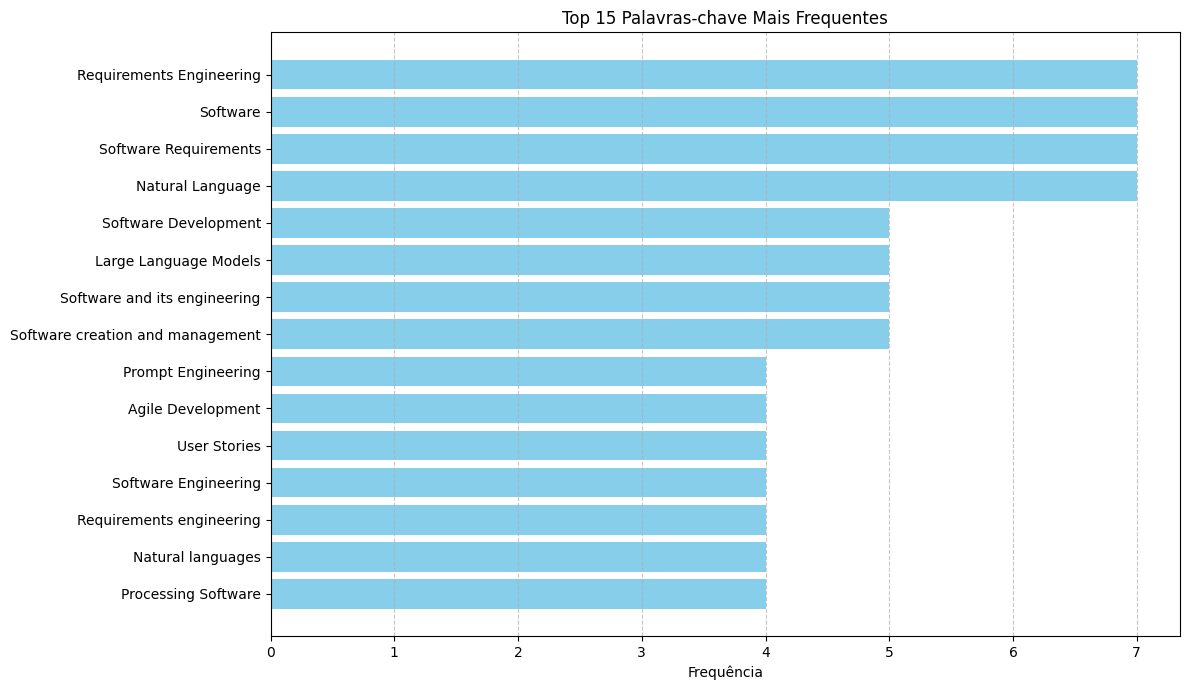

In [59]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

valid_keywords = [k for k in df_papers_approved["keywords"] if isinstance(k, list)]

flat_keywords = list(itertools.chain.from_iterable(valid_keywords))
keyword_counts = Counter(flat_keywords)

most_common = keyword_counts.most_common(15)
labels, counts = zip(*most_common)

plt.figure(figsize=(12, 7))
plt.barh(labels[::-1], counts[::-1], color='skyblue')
plt.xlabel("Frequência")
plt.title("Top 15 Palavras-chave Mais Frequentes")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [63]:
df_papers_approved["source_url"].iloc[13]

'https://dl.acm.org/doi/10.1145/3652620.3686246'

In [70]:
from dataclasses import dataclass, field
from typing import List, Optional

@dataclass
class PaperAnalysis:
    source_url: str
    datasets: Optional[List[str]] = field(default_factory=list)
    models: List[str] = field(default_factory=list)
    tasks: List[str] = field(default_factory=list)
    metrics: Optional[List[str]] = field(default_factory=list)
    
paper0 = PaperAnalysis(
    source_url="https://dl.acm.org/doi/10.1145/3652620.3686246",
    datasets=[],
    models=["GPT-4", "Llama", "Cohere"],
    tasks=["Automatically generate goal models from user stories", "Iterative Prompt Engineering"],
    metrics=[]
)
paper1 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/9848290",
    datasets=["SRS documents of 28 different systems"],
    models=["Multinomial Naive Bayes", "Gaussian Naive Bayes"],
    tasks=["Classify Actors and Use Cases from SRS documents", "Automate UML Use Case diagram generation"],
    metrics=["Accuracy"]
)
paper2 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10260954",
    datasets=["Software Engineering Contracts (SE Contracts)"],
    models=["GPT-3", "BART", "GPT-2", "T5", "Pegasus"],
    tasks=[
        "Generate SE-specific summaries from contract obligations",
        "Prompt Engineering for abstractive summarization",
        "Evaluate NLG models using ROUGE scores"
    ],
    metrics=["ROUGE"]
)
paper3 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10467677",
    datasets=["Diverse user stories corpora"],
    models=["N-gram model", "GPT-3"],
    tasks=[
        "Automatically generate user stories",
        "Compare user story quality using BLEU, ROUGE-N, and BERTScore metrics"
    ],
    metrics=["ROUGE-N", "BLEU", "BERTScore"]
)
paper4 = PaperAnalysis(
    source_url="https://dl.acm.org/doi/10.1007/s10515-022-00371-9",
    datasets=[],
    models=["QAExtractor", "QAPrioritiser (rule-based NLP framework)"],
    tasks=[
        "Extract quality attributes from user stories",
        "Prioritize quality attributes based on frequency, role impact, and criticality"
    ],
    metrics=["Precision", "Recall", "F-Measure"]
)
paper5 = PaperAnalysis(
    source_url="https://dl.acm.org/doi/10.1007/978-3-031-78386-9_20",
    datasets=[],
    models=["GPT-3.5", "GPT-4o"],
    tasks=["Generate user stories from project descriptions",
        "Assess quality of generated user stories",
        "Prioritize requirements "],
    metrics=["Semantic Similarity Score"]
)
paper6 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10893343",
    datasets=[],
    models=["GPT-4 Turbo"],
    tasks=[ "Generate user stories using LLMs and prompt engineering",
        "Compare effectiveness of user stories generated by traditional vs. AI-based methods",
        ],
    metrics=[]
)
paper7 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10544242",
    datasets=[],
    models=["gpt-3.5-turbo", "Llama-2-chat-hf"],
    tasks=["Categorize user stories to their sector domains",
        "Evaluate LLMs under zero-shot and few-shot prompting",
        "Automate user story categorization using prompt engineering"],
    metrics=["F-score"]
)
paper8 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10764984",
    datasets=["1,200 sub-features manually analyzed"],
    models=["LLM-based approach"],
    tasks=[
        "Compare feature elicitation approaches: App Store vs. LLM",
        "Analyze sub-features recommended by both methods",
        "Identify benefits and limitations of LLM-based inspiration"
        ],
    metrics=[]
)
paper9 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10663055",
    datasets=["Prompt examples mapped to SWEBoK knowledge areas"],
    models=["ChatGPT", "Mistral", "LLaMA"],
    tasks=[
        "Develop a catalog of prompts for software engineering training",
        "Evaluate prompt responses in tasks such as requirements elicitation, diagram generation, API simulation, effort estimation",
        "Assess LLMs in the context of software engineering pedagogy"
    ],
    metrics=["Qualitative analysis", "Quantitative analysis of quality, usefulness, and correctness"]
)
paper10 = PaperAnalysis(
    source_url="https://dl.acm.org/doi/10.1007/s42979-023-02212-2",
    datasets=["User stories (clustered using K-means and K-medoids)"],
    models=["K-means", "K-medoids"],
    tasks=[
        "Cluster user stories in Agile Software Development",
        "Compare clustering performance to increase cohesiveness among user stories"
    ],
    metrics=["Silhouette Coefficient"]
)
paper11 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10521022",
    datasets=["PROMISE_exp (1000 software requirements)", "PROMISE_IoT (2000 software and IoT requirements)"],
    models=["NLTK", "Chat-GPT"],
    tasks=[
        "Classify functional and non-functional requirements",
        "Classify requirements by system classes",
        "Generate unanticipated requirements for enhanced project success"
    ],
    metrics=[]
)
paper12 = PaperAnalysis(
    source_url="https://dl.acm.org/doi/10.1007/s10515-024-00448-7",
    datasets=[
        "Gold standard manually created by practitioners for evaluating user stories with acceptance criteria (US-AC)"
    ],
    models=["GPT-3", "GPT-3.5-turbo", "LLaMA series"],
    tasks=[
        "Simulate agile collaboration using role-based prompts with LLMs",
        "Generate acceptance criteria from user stories (GAC)",
        "Evaluate LLM-generated US-AC against human-written criteria",
        "Follow a create-update-update paradigm for AC generation"
    ],
    metrics=[
        "Completeness",
        "Validity",
        "INVEST"
    ]
)
paper13 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10256364",
    datasets=["40 selected papers from four computer science databases (systematic review corpus)"],
    models=[],
    tasks=[
        "Systematically review the use of user stories in requirements elicitation",
        "Identify common problems in user stories (e.g., ambiguity, incompleteness)",
        "Categorize research approaches addressing issues in user stories"
    ],
    metrics=[
        "Frequency count of problems in user stories"
    ]
)
paper14 = PaperAnalysis(
    source_url="https://dl.acm.org/doi/10.1145/3652620.3687810",
    datasets=[],
    models=["GPT-4", "Gemini"],
    tasks=[
        "Generate standard and UCM4IoT use case models from informal IoT problem descriptions"
    ],
    metrics=[
    ]
)
paper15 = PaperAnalysis(
    source_url="https://ieeexplore.ieee.org/document/10628461",
    datasets=[],
    models=["GPT-4", "CodeLlama"],
    tasks=["Generate Software Requirements Specification (SRS) documents from natural language",
        "Evaluate LLM-generated SRS against human-written benchmarks",
        "Identify and rectify issues in existing requirements documents",
        "Compare LLM outputs with entry-level software engineers"],
    metrics=["Eight quality criteria",
        "Human expert evaluation",
        "Time reduction analysis"]
)
#gerar dataframe com os dados dos papers
papers_analysis = [paper0, paper1, paper2, paper3, paper4, paper5, paper6, paper7, paper8, paper9, paper10, paper11, paper12, paper13, paper14, paper15]
df_papers_analysis = pd.DataFrame([asdict(paper) for paper in papers_analysis])

In [82]:
df_papers_analysis
df_papers_approved = df_papers_approved.merge(df_papers_analysis, on="source_url", how="left")
df_papers_approved.columns

Index(['title', 'date', 'abstract', 'DOI', 'source_url', 'authors', 'keywords',
       'datasets_x', 'models_x', 'tasks_x', 'metrics_x', 'datasets_y',
       'models_y', 'tasks_y', 'metrics_y', 'datasets', 'models', 'tasks',
       'metrics'],
      dtype='object')

In [89]:
pd.set_option("display.max_colwidth", None)  
print(df_papers_approved[["source_url", "models", "metrics"]].to_string())

                                             source_url                                                   models                                                                                metrics
0         https://ieeexplore.ieee.org/document/10544242                         [gpt-3.5-turbo, Llama-2-chat-hf]                                                                              [F-score]
1         https://ieeexplore.ieee.org/document/10256364                                                       []                                          [Frequency count of problems in user stories]
2          https://ieeexplore.ieee.org/document/9848290          [Multinomial Naive Bayes, Gaussian Naive Bayes]                                                                             [Accuracy]
3         https://ieeexplore.ieee.org/document/10467677                                    [N-gram model, GPT-3]                                                             [ROUGE-N, BLEU, BERTScore]
